# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fadia Zahran Zain
- **Email:** fadiazzahranzain@gmail.com
- **ID Dicoding:** Fadia Zahran Zain

## Menentukan Pertanyaan Bisnis


*   Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
*   Produk apa yang paling banyak dan paling sedikit terjual?
*   Bagaimana demografi pelanggan yang kita miliki?
*   Kapan terakhir pelanggan melakukan transaksi?
*   Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?








## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [2]:
#Memuat tabel customers

customers_df = pd.read_csv("olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#Memuat tabel orders

orders_df = pd.read_csv("olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#Memuat tabel order items

order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#Memuat tabel order reviews

order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
#Memuat tabel products

products_df = pd.read_csv("olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
#Memuat tabel payments

payments_df = pd.read_csv("olist_order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**



*   Pada tahap ini kita bisa melihat data yang terdapat pada semua dataset yang kita gunakan untuk melakukan analisis lanjutan pada tahap berikutnya. Melakukan pembacaan dataset pada tahap awal juga sangat mempengaruhi step berikutnya.



### Assessing Data

In [8]:
#Menilai Data customers_df

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [10]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [11]:
#Menilai Data orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat perbedaan data pada 3 kolom yaitu order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date. hal ini menunjukkan adanya missing value pada data tersebut, maka dari itu kita akan menjalankan kode untuk mengidentifikasi missing value

In [12]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


dari kode terseebut kita sudah mengetahui kolom mana saja yang terdapat miising value yaitu, order_approved_at	160,order_delivered_carrier_date	1783, order_delivered_customer_date	2965. hal ini akan di tangani saat cleaning data

In [13]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


tidak terdapat duplikat data pada tabel orders

In [14]:
#Menilai Data order_items_df

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


tidak terdapat missing value maupun duplikat pada data order_items

In [17]:
#Menilai Data order_reviews_df

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


terdapat missing value pada tabel order_reviews yaitu review_comment_title	87656, review_comment_message	58247. hal ini akan kita tangani pad cleaning data

In [19]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


tidak terdapat duplikat data tabel order_reviews

In [20]:
#Menilai Data products_df

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


terdapat missing value yang lumayan banyak pada tabel product, ini akan kita bersihkan di cleaning data

In [22]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [23]:
#Menilai Data payments_df

payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
#Kode ini akan menampilkan informasi terkait jumlah missing values

payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
#Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.


print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**



*   pada tahap assesing kita akan melihat bagaimana kode tersebut `data_df.isna().sum()` mengeluarkan output untuk mencari missing value pada dataset yang kita gunakan. Ada 3 data set yang kita gunakan terdapat missing value yaitu order_dr, order_review_df, dan product_df. Ketiga data tersebut akan kita lakukan cleaning data untuk mengganti atau menghapus kolom yang terdapat missing valur dalam dataset.

*   pada tahap asssesing pula kita mencari duplikat data yang terdapat dalam dataset dengan menggunakan kode berikut `print("Jumlah duplikasi: ", data_df.duplicated().sum())`. Pada dataset yang kita gunakan untuk melakukan analisis tidak terdapat duplikat data yang ditemukan pada output code tersebut. Maka dari itu pada tahap cleaning kita hanya akan melakukan tahapan missing value



### Cleaning Data

In [26]:
#Membersihkan Data orders_df

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [28]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna('tanggal_default')

In [29]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].mean())

In [30]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate()

In [31]:
print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


pada kolom orders suda di tangani missing value berserta perubahan pada time series yang sebelumnya object menjadi datetime.

In [32]:
# Mengisi dengan string tertentu
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Tidak ada judul')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Tidak ada komentar')

In [33]:
# Mengisi nilai numerik dengan 0 (jika ada kolom numerik)
order_reviews_df['review_score'] = order_reviews_df['review_score'].fillna(0)

In [34]:
print(order_reviews_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


pada kolom order reviews juga sudah mengosongkan kolom yang terdapat missing value

In [35]:
# Mengisi dengan nilai tertentu
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(0)
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(1)  # Misalnya, jika 1 adalah nilai default
products_df['product_category_name'] = products_df['product_category_name'].fillna(1)
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(0)

In [36]:
# Mengisi dengan rata-rata
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

In [37]:
print(products_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


kita sudah mengisi yang terdapat pada missing value dengan isi nilai tertentu dan mengisi denagn rata-rata

**Insight:**



*   Pada tahap cleaning data ini kita akan membersihkan missing value yang terdapat dalam dataset. Data yang kita gunakan pertama untuk dilakukan cleaning data yaitu mengganti beberapa kolomm pada dataset order menjadi datetime dengan kode berikut `datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]`
Kode ini `orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna('tanggal_default') `mengganti nilai yang hilang (NaN) pada kolom order_delivered_customer_date dengan string 'tanggal_default'. Ini bisa jadi langkah awal untuk menghindari error saat analisis lebih lanjut, tetapi mengganti dengan string mungkin bukan pendekatan yang ideal jika kolom ini seharusnya berisi tanggal. Di sini, kolom order_approved_at diisi dengan nilai rata-rata dari kolom yang sama `orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].mean())`. Namun, ini tidak tepat karena order_approved_at seharusnya berisi data waktu, dan menggunakan rata-rata di sini mungkin tidak memberikan hasil yang relevan. Pada langkah ini, kode melakukan interpolasi untuk mengisi nilai yang hilang dalam kolom order_delivered_carrier_date `orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate()`. Ini adalah metode yang lebih baik untuk mengisi nilai yang hilang, terutama jika data memiliki urutan waktu, karena interpolasi dapat mempertahankan konteks data.


*   Selanjutnya kita akan melakukan cleaning data pada dataset `order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Tidak ada komentar')` Kode ini mengganti nilai yang hilang (NaN) pada kolom review_comment_title dengan string 'Tidak ada komentar'. Ini adalah pendekatan yang baik untuk kolom teks, karena memberikan konteks yang jelas ketika tidak ada komentar yang diberikan. Lalu `order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Tidak ada komentar')` Di sini, kolom review_comment_message juga diisi dengan string 'Tidak ada komentar'. Namun, jika kolom ini seharusnya berisi nilai numerik, maka penggunaan string tidak tepat. Hal ini menunjukkan bahwa mungkin ada kesalahan dalam penanganan data, dan perlu ditinjau apakah kolom ini memang seharusnya berisi teks atau ada kesalahan dalam tipe datanya.



*   Selanjutnya kita melakukan cleaning pada dataset ketiga yaitu product_df. Kode ini mengganti nilai yang hilang (NaN) pada kolom product_description_length dengan 0 `products_df['product_description_length'] = products_df['product_description_length'].fillna(0)`
. Pendekatan ini bisa diterima jika 0 dianggap sebagai nilai yang bermakna (misalnya, produk tanpa deskripsi). Namun, perlu dipastikan bahwa 0 tidak menyesatkan dalam analisis. lalu pada kode ini `products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean())`
`products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mean())`
`products_df['product_name_length'] = products_df['product_name_length'].fillna(products_df['product_name_length'].mean())` Di sini, kolom product_photos_qty, product_category_name, dan product_name_length diisi dengan nilai rata-rata dari masing-masing kolom. Ini adalah pendekatan yang baik untuk menangani nilai hilang dalam kolom numerik, karena rata-rata dapat memberikan estimasi yang masuk akal berdasarkan data yang ada. Namun, penggunaan rata-rata untuk kolom kategori (product_category_name) tidak tepat, karena rata-rata tidak relevan untuk data kategorikal. Untuk kolom kategorikal, metode pengisian yang lebih tepat bisa berupa modus atau pengisian dengan kategori yang paling umum.







## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [39]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [40]:
#Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan negar bagian (state)

customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [41]:
#Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan negar bagian (state)

customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota Sao Paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian Spanyol.

In [42]:
orders_df = pd.read_csv("olist_orders_dataset.csv")
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [43]:
#Eksplorasi Data orders_df

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [45]:
#Eksplorasi Data orders_df

delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [46]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,23.675265
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,2.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,18.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,23.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,28.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,155.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 18 hari dengan nilai maksimum sebesar 155 hari dan nilai minimum sebesar 2 hari.

Oke, sekarang kita telah memiliki cukup informasi terkait data orders_df, selanjutnya kita akan coba mencari informasi lain dengan menghubungkan data tersebut dengan data customers_df.



In [47]:
#Eksplorasi Data orders_df dan customers_df

customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
93877,99d937de3eec6f7cb8486b48f2379fc0,122b4a4fb6bf6a990833464b56f2f65b,89204,joinville,SC,Active
20673,4c77d8983049548558beb913d9de38ba,54b1e10e822b9b303d8ef8845cc3901d,3169,sao paulo,SP,Active
53298,fa201b6b789affbeac2780ea9acf8c46,41dba3bb0865d951cc1ea1c58fb7134c,66033,belem,PA,Active
16698,81fbbce08531c4ba0446abd69996acc3,c165003468fa4ab103c5e83a97b90e4a,4261,sao paulo,SP,Active
18543,1d0c4d56d5c41a141201ea8df99e59bc,fcda364be74555da695b4afe5166c2b1,95935,capitao,RS,Active


In [48]:
#Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table.
##Berikut contoh kode untuk membuat pivot table menggunakan kolom “status”.

customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


seperti yang terlihat pada pivot dia ats bahwa pelanggan aktif semua dan tidak ada yg non aktif

In [49]:
#Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge.
##Berikut merupakan contoh kode untuk melakukan merge terhadap data orders_df dan customers_df.

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


Pada kode di atas, kita melakukan proses merge dengan metode “left”. Tentunya Anda masih ingat bukan dengan metode tersebut.
Yap, betul sekali metode ini memungkinkan kita untuk mengambil semua nilai dari tabel kiri serta nilai yang bersesuaian dengan tabel kanan.
Berikut merupakan tampilan data dari kode di atas. Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas.
Berikut merupakan beberapa hal yang bisa dijelajahi.

In [50]:
#Jumlah order berdasarkan kota

orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


nah, berdasarkan hasil tersebut terlihat bahwa kota Sao Paulo, Rio De Janeiro, Belo Horizonte, Brasilia, dan Curitiba menduduki posisi 4 besar dengan jumah kota yang memiliki order terbanyak

In [51]:
#Jumlah order berdasarkan state

orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Kode tersebut akan menghasilkan pivot table seperti di bawah ini.
Berdasarkan pivot table tersebut, diketahui bahwa Spanyol merupakan state yang balik banyak melakukan order sebanyak 41746.

In [52]:
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [53]:
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [54]:
products_df = pd.read_csv("olist_products_dataset.csv")
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [55]:
products_df.describe(include="all")
order_reviews_df.describe(include="all")
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 39 hingga 6735 dolar. selain itu pada data tersebut juga kita dapet melihat freight_value tertinggi yaitu 4096 dollar.

In [56]:
#Apabila Anda penasaran dengan produk yang memiliki harga termahal dan terendah, silakan jalankan kode berikut untuk melihatnya.

order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


pada data tersebut dapat dilihat bahwa produk dengan harga tertinggi ada pada 489ae2aa008f021502940f251d4cce7f dengan harga 6735 dollar dengan freight_value 194.31

In [57]:
#Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan order id dan order item produknya.
##Berikut contoh kode yang bisa Anda gunakan.

order_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": ["min", "max"]
})

order_id order_item_id   price        
                                  nunique           sum     min     max
product_id                                                             
00066f42aeeb9f3007548bb9d3f33c38        1             1  101.65  101.65
00088930e925c41fd95ebfe695fd2655        1             1  129.90  129.90
0009406fd7479715e4bef61dd91f2462        1             1  229.00  229.00
000b8f95fcb9e0096488278317764d19        2             2   58.90   58.90
000d9be29b5207b54e86aa1b1ac54872        1             1  199.00  199.00
...                                   ...           ...     ...     ...
fff6177642830a9a94a0f2cba5e476d1        2             2  109.99  119.99
fff81cc3158d2725c0655ab9ba0f712c        1             1   90.00   90.00
fff9553ac224cec9d15d49f5a263411f        1             1   32.00   32.00
fffdb2d0ec8d6a61f0a0a0db3f25b441        5             5   29.99   34.99
fffe9eeff12fcbd74a2f2b007dde0c58        1             1  249.99  249.99

[32951 rows x 4 columns]

berdasarkan pivot tabel di atas kita melihat bahwa ptoduk yang dibeli berdasarkan orer id dan order item meiliki harga yyang tdak terlalu signifikan perbedaannya.

In [58]:
#Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan order dan review orderan produknya.
##Berikut contoh kode yang bisa Anda gunakan.

order_reviews_df.groupby(by="order_id").agg({
    "review_id": "nunique",
    "review_score": "sum",
    "review_answer_timestamp": ["min", "max"]
})

review_id review_score  \
                                   nunique          sum   
order_id                                                  
00010242fe8c5a6d1ba2dd792cb16214         1            5   
00018f77f2f0320c557190d7a144bdd3         1            4   
000229ec398224ef6ca0657da4fc703e         1            5   
00024acbcdf0a6daa1e931b038114c75         1            4   
00042b26cf59d7ce69dfabb4e55b4fd9         1            5   
...                                    ...          ...   
fffc94f6ce00a00581880bf54a75a037         1            5   
fffcd46ef2263f404302a634eb57f7eb         1            5   
fffce4705a9662cd70adb13d4a31832d         1            5   
fffe18544ffabc95dfada21779c9644f         1            5   
fffe41c64501cc87c801fd61db3f6244         1            5   

                                 review_answer_timestamp                       
                                                     min                  max  
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214     2017-09-22 10:57:03  2017-09-22 10:57:03  
00018f77f2f0320c557190d7a144bdd3     2017-05-15 11:34:13  2017-05-15 11:34:13  
000229ec398224ef6ca0657da4fc703e     2018-01-23 16:06:31  2018-01-23 16:06:31  
00024acbcdf0a6daa1e931b038114c75     2018-08-15 16:39:01  2018-08-15 16:39:01  
00042b26cf59d7ce69dfabb4e55b4fd9     2017-03-03 10:54:59  2017-03-03 10:54:59  
...                                                  ...                  ...  
fffc94f6ce00a00581880bf54a75a037     2018-05-14 12:53:47  2018-05-14 12:53:47  
fffcd46ef2263f404302a634eb57f7eb     2018-07-25 09:25:29  2018-07-25 09:25:29  
fffce4705a9662cd70adb13d4a31832d     2017-10-29 21:33:52  2017-10-29 21:33:52  
fffe18544ffabc95dfada21779c9644f     2017-08-18 12:24:05  2017-08-18 12:24:05  
fffe41c64501cc87c801fd61db3f6244     2018-06-17 21:27:09  2018-06-17 21:27:09  

[98673 rows x 4 columns]

pada tabel reviews produk kita bisa melihat bahwa rata- rata pelanggan memberikan nilai 5 pada produk yang dibelinya, serta perbedaan waktu yang di jawab oleh toko tidak terlalu memiliki perbedaan yang jauh

In [59]:
#Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan order dan review orderan produknya.
##Berikut contoh kode yang bisa Anda gunakan.

products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_name_lenght": "sum",
    "product_weight_g": ["min", "max"]
})

product_id product_name_lenght product_weight_g  \
                             nunique                 sum              min   
product_category_name                                                       
agro_industria_e_comercio         74              3634.0             50.0   
alimentos                         82              3797.0             75.0   
alimentos_bebidas                104              4629.0             50.0   
artes                             55              2590.0            100.0   
artes_e_artesanato                19               841.0            100.0   
...                              ...                 ...              ...   
sinalizacao_e_seguranca           93              4449.0            100.0   
tablets_impressao_imagem           9               486.0            100.0   
telefonia                       1134             57211.0             50.0   
telefonia_fixa                   116              5617.0             50.0   
utilidades_domesticas           2335            112121.0             50.0   

                                    
                               max  
product_category_name               
agro_industria_e_comercio  30000.0  
alimentos                   8238.0  
alimentos_bebidas          10800.0  
artes                      15400.0  
artes_e_artesanato          6850.0  
...                            ...  
sinalizacao_e_seguranca    27100.0  
tablets_impressao_imagem    1100.0  
telefonia                   8100.0  
telefonia_fixa              6050.0  
utilidades_domesticas      30000.0  

[73 rows x 4 columns]

kalau pada data produk kita bisa melihat bahwa di setiap kategori produk memiliki perbedaan berat yang cukup jauh di anatar minimal dan juga maksimal

In [60]:
import pandas as pd

# Memuat semua tabel
customers_df = pd.read_csv("olist_customers_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
payments_df = pd.read_csv("olist_order_payments_dataset.csv")  # Memastikan pengetikan benar

In [61]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

In [62]:
# Menggabungkan orders_df dengan customers_df
orders_df_df = pd.merge(
    orders_df,
    customers_df,
    how='left',
    on='customer_id'
)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [63]:
# Menggabungkan orders_customers_df dengan order_items_df
orders_items_customers_df = pd.merge(
    orders_customers_df,
    order_items_df,
    how='left',
    on='order_id'
)
orders_items_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [64]:
# Menggabungkan orders_items_customers_df dengan order_reviews_df
final_df = pd.merge(
    orders_items_customers_df,
    order_reviews_df,
    how='left',
    on='order_id'
)
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [65]:
final_df.to_csv("final_combined_data.csv", index=False)

In [66]:
# Menampilkan kolom yang ada dalam final_df
print(final_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


**Insight:**



*   Pada tahapan EDA pertama kita akan melakukan analisis pada data customer dengan menggunakan kode customer_df.groupby('customer_state')['customer_id'].count().sort_values(ascending=False) Kode ini melakukan pengelompokan berdasarkan kolom customer_state dan menghitung jumlah customer_id untuk setiap status. Hal ini memberikan gambaran tentang distribusi pelanggan berdasarkan lokasi, yang penting untuk memahami pasar dan strategi pemasaran. Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota Sao Paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian Spanyol. Lalu kita akan melakukan tahapan groupby city dengan kode ini
`customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)` Kode ini mengelompokkan data berdasarkan customer_city dan menghitung jumlah unik customer_id untuk setiap kota. Ini memberikan informasi tentang seberapa banyak pelanggan yang terdaftar dari setiap kota, bukan hanya total transaksi. Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota Sao Paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian Spanyol.

*   tahapan EDA kedua pada kode `delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]` Waktu pengiriman dihitung dengan mengurangi tanggal pemesanan dari tanggal pengiriman yang diperkirakan. Hasil analisis menunjukkan bahwa waktu pengiriman rata-rata adalah 18 hari, dengan maksimum 155 hari dan minimum 2 hari. Ini memberikan gambaran tentang efisiensi pengiriman. Variabilitas yang besar dalam waktu pengiriman (dari 2 hingga 155 hari) menunjukkan adanya potensi masalah dalam rantai pasokan atau pengiriman, terutama untuk pesanan yang memerlukan waktu lama. Ini bisa menjadi area yang perlu diperbaiki untuk meningkatkan kepuasan pelanggan.


*   Tahapan ketiga pada EDA adalah melakukan analisis pada customer aktif dan tidak aktif pada dataset dengan kode `customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in orders_df["customer_id"].values else "Non Active")` Kode ini mengklasifikasikan pelanggan menjadi dua kategori: "Active" jika mereka memiliki setidaknya satu pesanan dalam orders_df, dan "Non Active" jika tidak. Ini membantu dalam memahami seberapa banyak pelanggan yang masih aktif bertransaksi. Berikutnya kita akan masukkan kode `customers_df.groupby("status").size()` Dengan mengelompokkan pelanggan berdasarkan status, perusahaan dapat menilai proporsi pelanggan aktif versus non-aktif. Hal ini penting untuk strategi pemasaran dan retensi, karena mengidentifikasi pelanggan non-aktif bisa menjadi langkah awal untuk kampanye re-engagement. Output pada tersebut setelah kita run adalah memngindikasi bahwa seluruh customer ecommerce aktif dengan jumlah pelanggan aktif 99441.

*   selanjutnya kita akan melakukan penggabungan data yaitu dengan kode `orders_customers_df = pd.merge(orders_df, customers_df, how="left", on="customer_id")` Kode ini menggabungkan data dari tabel orders_df dan customers_df menggunakan metode "left join". Ini memastikan bahwa semua data dalam orders_df tetap ada, sementara data dari customers_df ditambahkan berdasarkan kesesuaian customer_id. Metode ini berguna untuk menganalisis data pesanan dengan informasi tambahan tentang pelanggan. Berikutnya kita akan melakukan analisis jumlah pesanan berdasarkan kota dengan kode `orders_customers_df.groupby(by="customer_city").size().reset_index(name='jumlah_pesanan').sort_values(ascending=False).head(10)` Dengan mengelompokkan data berdasarkan customer_city, analisis ini menghitung jumlah pesanan untuk setiap kota. Ini membantu dalam mengidentifikasi kota mana yang paling aktif dalam melakukan pembelian, yang bisa menjadi fokus untuk strategi pemasaran dari 9 kota yang diambil sample kota yang paling sedikit adalah sao bernardo do campo dengan jumlah pesanan 938. Analisis lanjutan adalah analisis jumlah pesanan berdasarkan provinsi dengan kode `orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)` Kode ini menghitung jumlah unik order_id berdasarkan customer_state. Ini memberikan informasi tentang distribusi pesanan di berbagai provinsi, memungkinkan perusahaan untuk memahami pasar secara lebih baik dan menyesuaikan strategi mereka berdasarkan wilayah geografis.



*   Selanjutnya kita akan menganalisis produk dengan harga tertinggi dan harga terendah pada dataset penggunaan kode `order_items_df.sort_values(by="price", ascending=False) `memungkinkan kita untuk melihat produk dengan harga tertinggi terlebih dahulu. Pada contoh di atas, produk dengan harga tertinggi memiliki order_id yang tercantum, dengan harga sebesar 6735 dollar dan biaya pengiriman (freight_value) sebesar 194.31. Kode `order_items_df.groupby(by="product_id").agg(...)` membuat pivot table berdasarkan product_id, menghitung jumlah order_item_id, dan menampilkan harga minimum serta maksimum dari tiap produk. Dari hasil ini, dapat disimpulkan bahwa harga produk yang dibeli tidak menunjukkan perbedaan yang signifikan antara satu sama lain.

*   Tahapan kelima ini kita akan mmenganalisis dengan membuat pivot table untuk review produk dengan kode `order_reviews_df.groupby(by="order_id").agg(...)` membuat pivot table untuk mengelompokkan data review berdasarkan order_id. Hal ini membantu kita melihat berapa banyak review unik (review_id), total skor review (review_score), serta waktu review terawal dan terakhir (review_answer_timestamp). Berdasarkan data review ini, diperoleh insight bahwa pelanggan memberikan nilai rata-rata 5 pada produk yang mereka beli, dengan perbedaan waktu antara review pertama dan terakhir yang tersedia.



*  Pada tahap ke enamkita akan menganalisis dengan mengellompokkan data berdasarkan product_df yaitu product_category_name, product_name_lenght menjumlahkan total panjang nama produk. Sedangkan product_weight_g mencari berat minimum dan maksimum dari produk dalam kategori tersebut. Tabel ini menunjukkan variasi produk dalam kategori tertentu, serta perbedaan berat dan panjang nama produk. Dari sini, bisa dianalisis bagaimana distribusi berat produk di kategori tertentu serta apakah ada korelasi dengan panjang nama produk.

*  pada tahap ke tujuh kita menggambungkan data berikutnya yaitu penggabungan pertama terjadi antara orders_df dan customers_df menggunakan customer_id sebagai kunci, dengan jenis join left. Ini berarti semua data di orders_df akan dipertahankan, dan data dari customers_df yang cocok dengan customer_id akan ditambahkan. Penggabungan ini menambahkan informasi pelanggan ke data pesanan, yang memungkinkan analisis lebih lanjut tentang perilaku pelanggan terkait dengan pesanan mereka.



*   Tahapan kedelapan ini setelah menggabungkan data pesanan dengan data pelanggan, tahap selanjutnya adalah menggabungkan hasilnya dengan order_items_df menggunakan order_id sebagai kunci, lagi-lagi dengan jenis join left. Proses ini menambahkan informasi mengenai item yang dipesan ke dataset yang sudah ada. Hasilnya, kita bisa melihat detail produk yang dipesan oleh setiap pelanggan.

*   Tahapan Kesembilan sebelum kita membuat fina data adalah menggabungkan data dari pesanan dan item yang sudah digabungkan sebelumnya dengan data review (order_reviews_df), lagi-lagi menggunakan order_id. Dengan menggabungkan data review, kita dapat menganalisis tidak hanya produk yang dipesan oleh pelanggan tetapi juga bagaimana pelanggan memberikan ulasan atas produk tersebut. Ini memberikan insight tambahan terkait tingkat kepuasan pelanggan.



*   Thaoan terakhir pada proses EDA yang kita laulkan adalah membuat final data yang telah digabungkan akhirnya disimpan dalam file CSV (final_combined_data.csv) untuk penggunaan atau analisis lebih lanjut. Data gabungan ini berisi informasi lengkap mulai dari pesanan, detail pelanggan, item yang dipesan, hingga ulasan pelanggan. Ini sangat berguna untuk analisis yang lebih mendalam terkait hubungan antara pesanan, produk, pelanggan, dan review, serta membuka peluang untuk melakukan analisis lebih lanjut seperti segmentasi pelanggan atau analisis kepuasan.













## Visualization & Explanatory Analysis

### Pertanyaan 1:

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


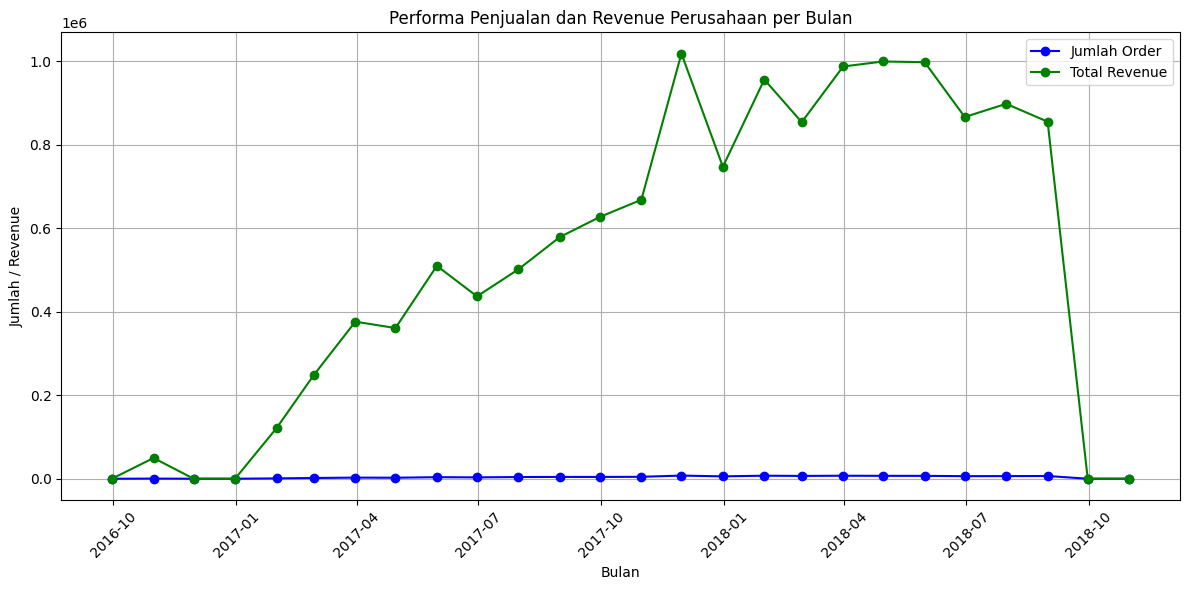

In [67]:
# Periksa kolom yang ada
print(final_df.columns)

# Menghitung total penjualan dan revenue
monthly_sales_revenue = final_df.resample('ME', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

monthly_sales_revenue.columns = ['order_date', 'total_orders', 'total_revenue']

# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_revenue['order_date'], monthly_sales_revenue['total_orders'], label='Jumlah Order', marker='o', color='blue')
plt.plot(monthly_sales_revenue['order_date'], monthly_sales_revenue['total_revenue'], label='Total Revenue', marker='o', color='green')
plt.title('Performa Penjualan dan Revenue Perusahaan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah / Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [68]:
# Menghitung jumlah penjualan per produk
product_sales = order_items_df.groupby('product_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

# Mengubah nama kolom untuk kemudahan
product_sales.columns = ['product_id', 'total_orders', 'total_revenue']

In [69]:
# Produk paling banyak terjual
most_sold_product = product_sales.loc[product_sales['total_orders'].idxmax()]

# Produk paling sedikit terjual
least_sold_product = product_sales.loc[product_sales['total_orders'].idxmin()]

print("Produk Paling Banyak Terjual:")
print(most_sold_product)

print("\nProduk Paling Sedikit Terjual:")
print(least_sold_product)

Produk Paling Banyak Terjual:
product_id       99a4788cb24856965c36a24e339b6058
total_orders                                  467
total_revenue                            43025.56
Name: 19742, dtype: object

Produk Paling Sedikit Terjual:
product_id       00066f42aeeb9f3007548bb9d3f33c38
total_orders                                    1
total_revenue                              101.65
Name: 0, dtype: object


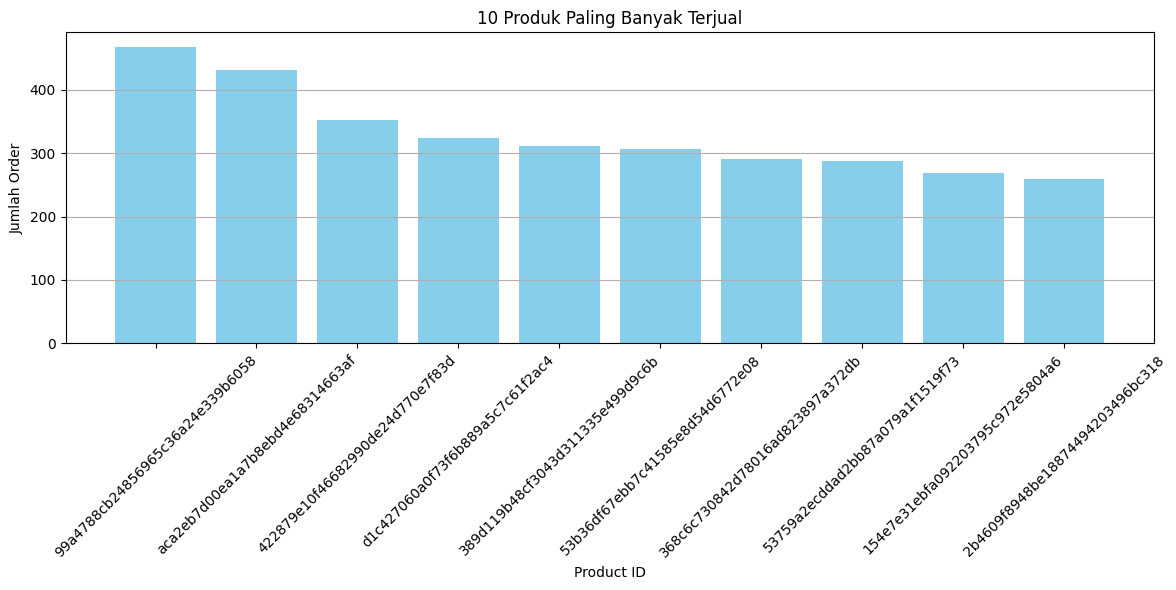

In [70]:
import matplotlib.pyplot as plt

# Mengurutkan data berdasarkan total orders
product_sales = product_sales.sort_values(by='total_orders', ascending=False)

# Mengambil 10 produk teratas untuk visualisasi
top_products = product_sales.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_products['product_id'].astype(str), top_products['total_orders'], color='skyblue')
plt.title('10 Produk Paling Banyak Terjual')
plt.xlabel('Product ID')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

visualisasi yang jelas mengenai 10 produk yang paling banyak terjual, memberikan wawasan yang berharga tentang performa penjualan produk kita. KIta dapat mengetahui bahwa produk yang paling laris adalah kode 99a4788cb24856965c36a24e339b6058 dan yang sedikit dijual adalah 00066f42aeeb9f3007548bb9d3f33c38.

## Pertanyaan 3:

In [71]:
# Menghitung jumlah pelanggan berdasarkan kota
customer_city_counts = customers_df['customer_city'].value_counts().head(10)  # Mengambil 10 kota teratas

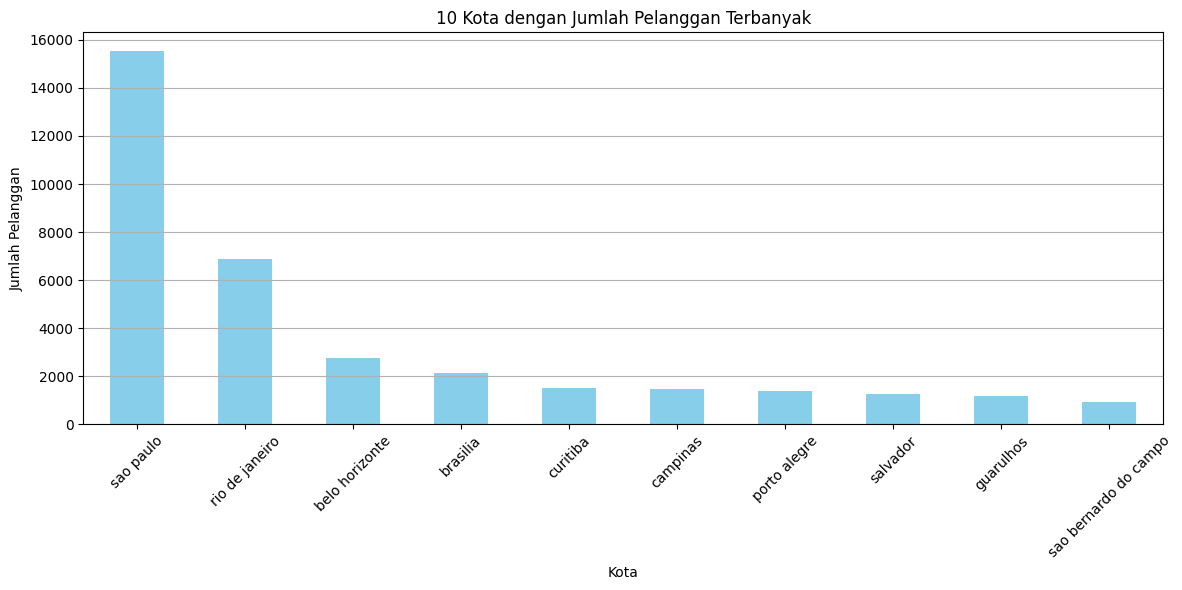

In [72]:
import matplotlib.pyplot as plt

# Visualisasi
plt.figure(figsize=(12, 6))
customer_city_counts.plot(kind='bar', color='skyblue')
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

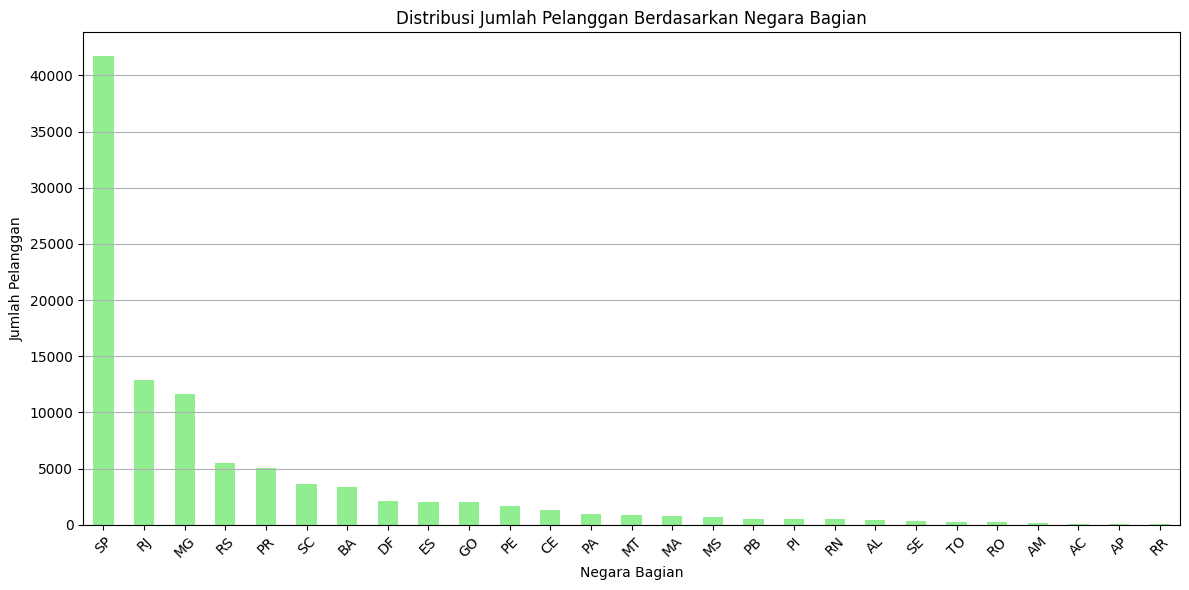

In [73]:
# Menghitung jumlah pelanggan berdasarkan negara bagian
customer_state_counts = customers_df['customer_state'].value_counts()

# Visualisasi
plt.figure(figsize=(12, 6))
customer_state_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

kita dapat mendapatkan wawasan yang jelas tentang demografi pelanggan kita berdasarkan lokasi. Jika dataset mencakup informasi tambahan (seperti usia atau jenis kelamin), kita dapat menyesuaikan analisis dan visualisasi untuk mencakup faktor-faktor tersebut.

## Pertanyaan 4:

In [74]:
# Mengonversi kolom order_purchase_timestamp ke datetime jika belum
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Menghitung tanggal transaksi terakhir untuk setiap pelanggan
last_transaction = orders_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()

# Mengubah nama kolom
last_transaction.columns = ['customer_id', 'last_transaction']

In [75]:
# Menghitung selisih hari dari hari ini
last_transaction['days_since_last'] = (pd.Timestamp.now() - last_transaction['last_transaction']).dt.days

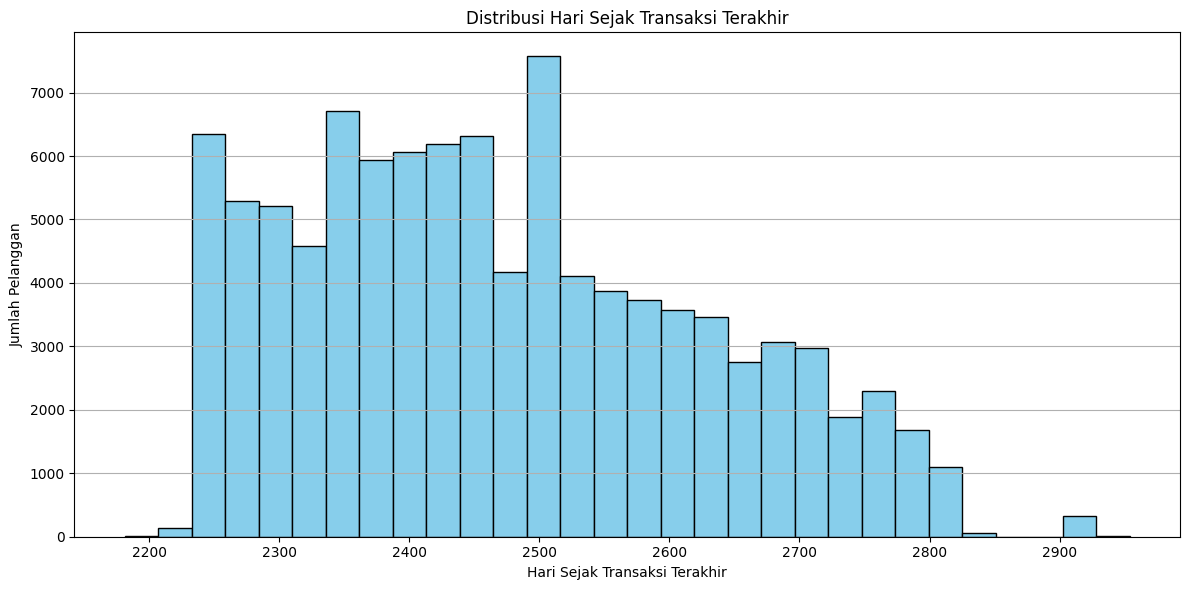

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(last_transaction['days_since_last'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Hari Sejak Transaksi Terakhir')
plt.xlabel('Hari Sejak Transaksi Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Dengan langkah-langkah ini, kita akan mendapatkan visualisasi yang jelas mengenai kapan pelanggan terakhir melakukan transaksi, memberikan wawasan yang berharga tentang perilaku pelanggan.

## Pertanyaan 5:

In [77]:
# Menghitung jumlah transaksi per pelanggan
purchase_frequency = orders_df.groupby('customer_id')['order_id'].count().reset_index()

# Mengubah nama kolom
purchase_frequency.columns = ['customer_id', 'total_purchases']

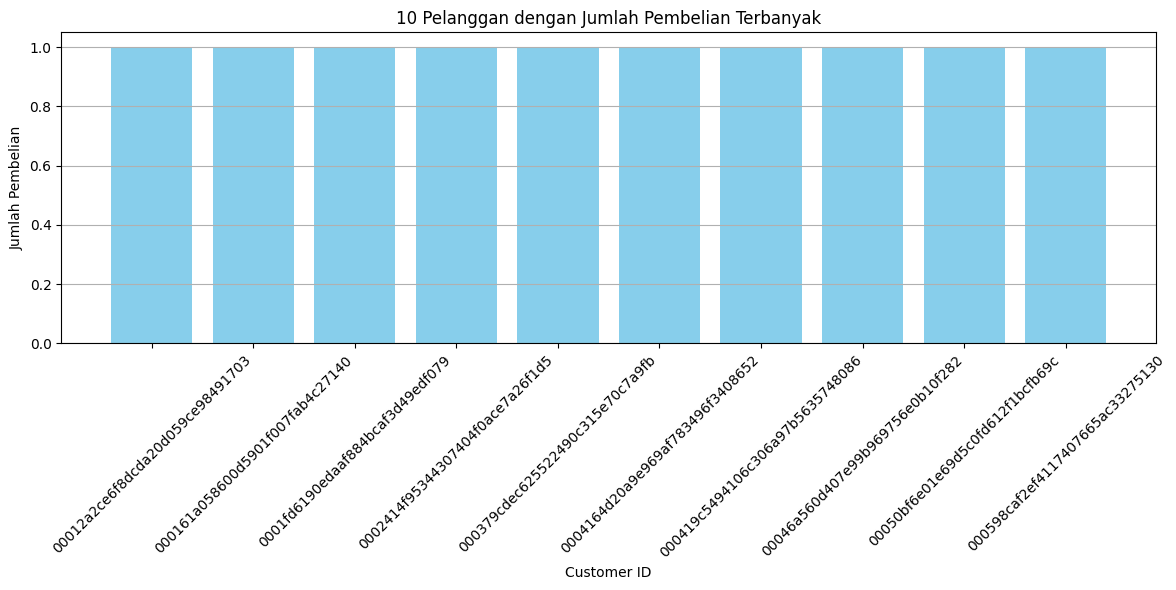

In [78]:
# Mengambil 10 pelanggan teratas berdasarkan jumlah pembelian
top_customers = purchase_frequency.nlargest(10, 'total_purchases')

plt.figure(figsize=(12, 6))
plt.bar(top_customers['customer_id'].astype(str), top_customers['total_purchases'], color='skyblue')
plt.title('10 Pelanggan dengan Jumlah Pembelian Terbanyak')
plt.xlabel('Customer ID')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Dengan langkah-langkah ini, Anda dapat menganalisis dan memvisualisasikan seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir, memberikan wawasan berharga tentang perilaku pembelian pelanggan.

**1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**



---> Penghitungan Total Penjualan dan Revenue Bulanan Kode ini menghitung total pesanan dan total pendapatan (revenue) per bulan menggunakan metode resample pada kolom order_purchase_timestamp. Agregasi dilakukan dengan menghitung jumlah pesanan unik (nunique) dan menjumlahkan harga produk yang dipesan (sum pada kolom price). Dari penghitungan ini, kita bisa melihat performa penjualan dan pendapatan bulanan. Kolom total_orders akan menunjukkan jumlah pesanan per bulan, sementara kolom total_revenue akan menunjukkan pendapatan total per bulan. Satu garis menunjukkan jumlah pesanan bulanan (total_orders), dan Garis lainnya menunjukkan total pendapatan bulanan (total_revenue). Dengan melihat grafik ini, kita bisa mengidentifikasi pola musiman atau anomali dalam jumlah pesanan dan pendapatan perusahaan setiap bulannya. Misalnya, apakah ada bulan tertentu yang menunjukkan lonjakan penjualan atau pendapatan, atau apakah penjualan menurun pada periode tertentu. Pada grafik, label sumbu X adalah "Bulan" dan sumbu Y adalah "Jumlah / Revenue". Rotasi pada label sumbu X (bulan) dibuat agar lebih mudah dibaca dengan rotasi 45 derajat. Grafik ini memberikan gambaran jelas mengenai hubungan antara jumlah pesanan dan pendapatan dalam periode waktu tertentu. Ini membantu dalam mengevaluasi apakah peningkatan pesanan selalu diikuti oleh peningkatan pendapatan, atau jika ada situasi di mana lebih banyak pesanan tidak selalu berarti lebih banyak pendapatan.

**2. Produk apa yang paling banyak dan paling sedikit terjual?**


---> Penghitungan Total Penjualan per Produk jumlah pesanan unik per produk (order_id: nunique), yang memberikan informasi mengenai seberapa banyak pesanan yang mencakup produk tersebut. Jumlah total pendapatan (price: sum) yang dihasilkan dari setiap produk. Dari sini, kita dapat mengetahui total pesanan dan pendapatan per produk, yang bisa menjadi dasar analisis performa produk di pasar. Kode ini menggunakan fungsi idxmax() untuk menemukan produk yang paling banyak terjual (total_orders tertinggi) dan idxmin() untuk menemukan produk yang paling sedikit terjual (total_orders terendah). Dari sini kita dapat mengetahui produk yang paling diminati pelanggan dan produk yang kurang laku. Informasi ini sangat berguna untuk pengambilan keputusan terkait stok, strategi pemasaran, atau penghapusan produk yang tidak laku.

**3. Bagaimana demografi pelanggan yang kita miliki?**


---> Menghitung Jumlah Pelanggan Berdasarkan Kota kode pertama menghitung jumlah pelanggan berdasarkan kota menggunakan value_counts() pada kolom customer_city dari customers_df. Hasilnya diambil 10 kota teratas dengan jumlah pelanggan terbanyak. Visualisasi menggunakan grafik batang (bar plot) untuk menampilkan 10 kota dengan jumlah pelanggan terbanyak. Kota-kota ini diberi label pada sumbu X, sementara sumbu Y menunjukkan jumlah pelanggan dari masing-masing kota. Kota-kota yang ditampilkan dalam grafik merupakan lokasi geografis dengan jumlah pelanggan terbesar. Informasi ini penting untuk memahami sebaran pelanggan secara geografis dan membantu dalam pengambilan keputusan pemasaran regional, misalnya menentukan strategi promosi yang lebih fokus pada kota-kota yang memiliki konsentrasi pelanggan tertinggi.


---> Menghitung Jumlah Pelanggan Berdasarkan Negara Bagian (State) kode kedua menghitung jumlah pelanggan berdasarkan negara bagian (customer_state) menggunakan value_counts(). Data ini kemudian divisualisasikan menggunakan grafik batang yang menampilkan distribusi jumlah pelanggan di setiap negara bagian. Distribusi pelanggan berdasarkan negara bagian memberi gambaran lebih luas tentang wilayah dengan konsentrasi pelanggan terbesar. Ini dapat membantu dalam pengambilan keputusan untuk ekspansi pasar atau strategi logistik, seperti penentuan lokasi gudang atau pusat distribusi.

**4. Kapan terakhir pelanggan melakukan transaksi?**


---> Kode ini memastikan bahwa kolom order_purchase_timestamp pada orders_df dikonversi ke dalam format datetime jika belum. Hal ini penting untuk melakukan operasi terkait waktu pada data, seperti menghitung selisih hari atau melakukan agregasi berdasarkan tanggal. Kode menghitung tanggal terakhir kali seorang pelanggan melakukan transaksi dengan mengelompokkan data berdasarkan customer_id dan mengambil nilai maksimum dari order_purchase_timestamp. Dari sini, kita bisa mengetahui kapan terakhir kali setiap pelanggan melakukan pembelian. Ini bisa digunakan untuk mengidentifikasi pelanggan yang sudah lama tidak melakukan transaksi dan mungkin memerlukan retargeting. Kode ini menghitung selisih hari antara hari ini (pd.Timestamp.now()) dan tanggal terakhir transaksi pelanggan (last_transaction). Hasil selisih ini disimpan dalam kolom baru days_since_last. Dengan menghitung berapa hari yang telah berlalu sejak transaksi terakhir, kita dapat mengetahui pelanggan yang telah lama tidak berbelanja. Informasi ini berguna untuk mengukur loyalitas pelanggan atau untuk menargetkan kampanye pemasaran ulang. Distribusi jumlah hari sejak transaksi terakhir divisualisasikan menggunakan histogram. Histogram ini memiliki 30 bins, dan warna batang diatur menjadi skyblue dengan garis tepi hitam. Dari histogram ini, kita bisa melihat pola frekuensi dari berapa lama sejak pelanggan terakhir kali bertransaksi. Jika ada puncak di bagian awal histogram, ini menunjukkan bahwa banyak pelanggan baru-baru ini bertransaksi. Sebaliknya, jika sebagian besar pelanggan berada di bagian akhir histogram, ini bisa berarti banyak pelanggan telah lama tidak bertransaksi dan mungkin membutuhkan perhatian lebih dari segi pemasaran.

**5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**


---> Kode ini mengelompokkan data pada orders_df berdasarkan customer_id dan menghitung jumlah pesanan (order_id) yang dilakukan oleh setiap pelanggan menggunakan .count(). Hasil dari penghitungan ini disimpan dalam dataframe purchase_frequency, di mana kolom customer_id menyimpan identitas pelanggan dan kolom total_purchases menyimpan jumlah pesanan yang dilakukan oleh pelanggan tersebut. Data ini memberikan informasi mengenai frekuensi transaksi setiap pelanggan. Dengan data ini, perusahaan dapat mengidentifikasi pelanggan yang paling aktif melakukan pembelian. Menggunakan .nlargest(10, 'total_purchases') untuk memilih 10 pelanggan teratas yang memiliki jumlah pembelian terbanyaK,Ini memungkinkan identifikasi pelanggan yang paling banyak berkontribusi terhadap penjualan. Pelanggan ini mungkin merupakan pelanggan setia atau pelanggan bernilai tinggi yang perlu mendapatkan perhatian khusus dari sisi layanan atau program loyalitas. Visualisasi ini menampilkan 10 pelanggan dengan jumlah pembelian terbanyak menggunakan grafik batang (bar plot). Sumbu X berisi Customer ID, sedangkan sumbu Y menampilkan jumlah pembelian (total_purchases). Setiap batang dalam grafik mewakili satu pelanggan dan menunjukkan seberapa sering mereka melakukan pembelian. Dari grafik ini, kita dapat dengan cepat melihat siapa saja pelanggan yang paling banyak bertransaksi dan seberapa signifikan perbedaan jumlah pembelian di antara mereka. Perusahaan dapat mempertimbangkan untuk memberikan penghargaan atau insentif khusus kepada pelanggan ini guna mempertahankan loyalitas mereka.
















## **ANALISIS RFM**

In [79]:
print(order_items_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [82]:
rfm_data = pd.read_csv('rfm_data.csv')

In [85]:
rfm_data.columns = rfm_data.columns.str.strip().str.lower()

In [86]:
import pandas as pd

data = pd.read_csv('final_combined_data.csv')

# Ensure 'order_purchase_timestamp' is in datetime format
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Define the reference date for recency calculation (e.g., the most recent purchase date in the dataset)
reference_date = data['order_purchase_timestamp'].max()

# Group by customer and calculate Recency, Frequency, and Monetary metrics
rfm_data = data.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),  # Days since last purchase
    Frequency=('order_id', 'count'),  # Number of purchases
    Monetary=('price', 'sum')  # Total amount spent
).reset_index()

# Display the RFM data
print(rfm_data.head())


                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     18.90
2  0000f46a3911fa3c0805444483337064      585          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      336          1    180.00


In [87]:
print(rfm_data.columns)

Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [88]:
rfm_data.rename(columns={'Recency': 'recency'}, inplace=True)

<ipython-input-89-f7066f4844bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_unique_id", data=rfm_data.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/di

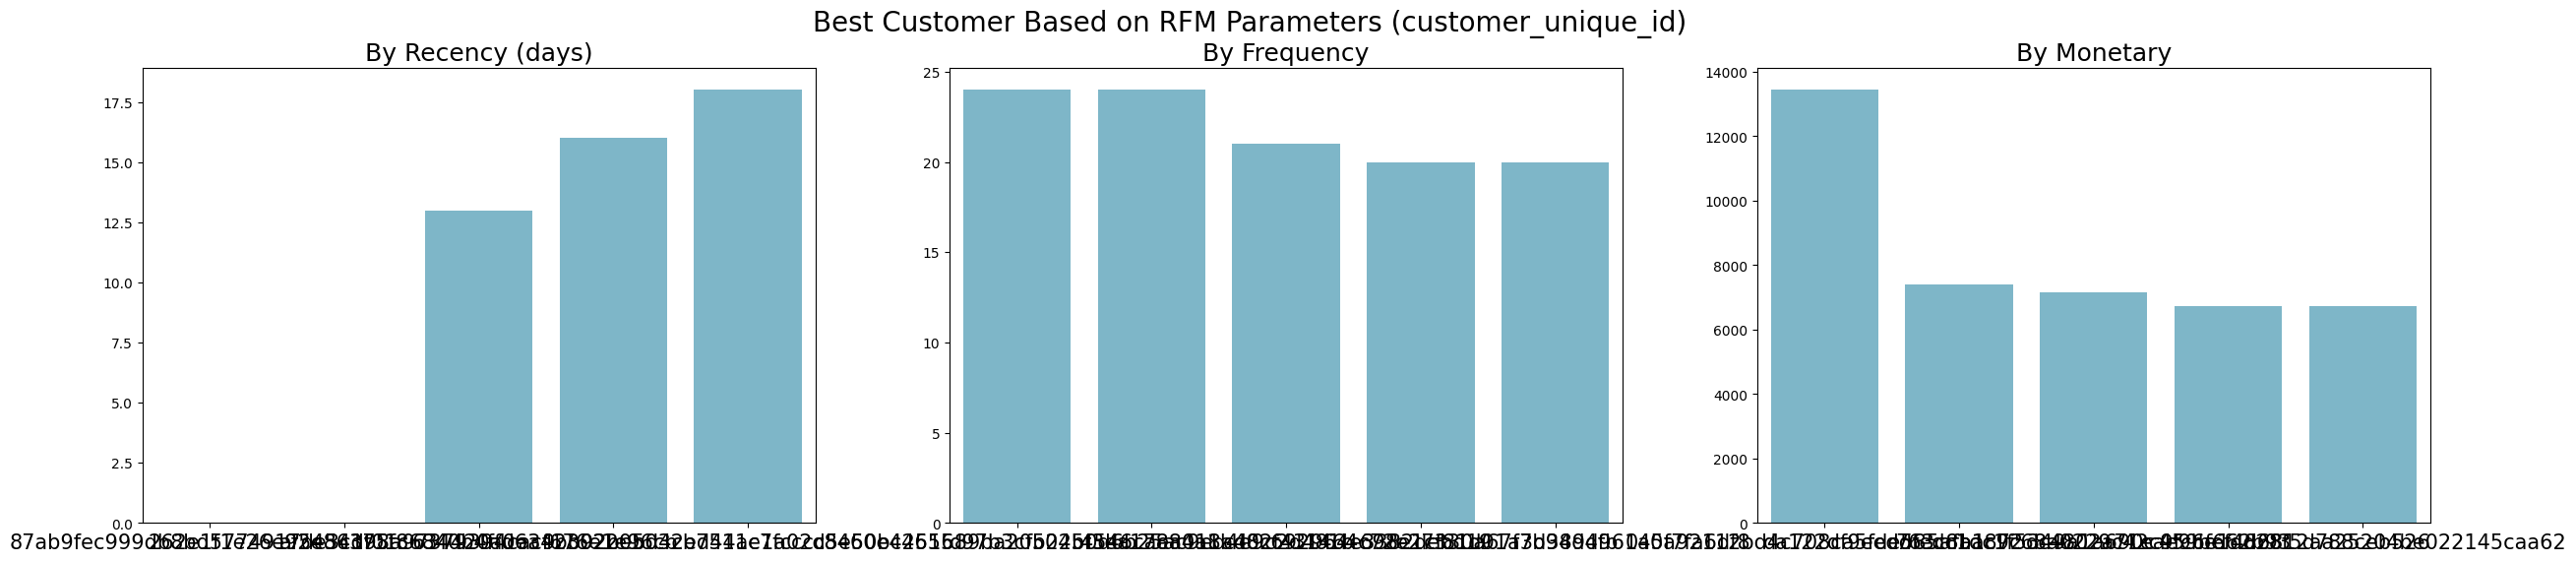

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# By Recency
sns.barplot(y="recency", x="customer_unique_id", data=rfm_data.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# By Frequency
sns.barplot(y="Frequency", x="customer_unique_id", data=rfm_data.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# By Monetary
sns.barplot(y="Monetary", x="customer_unique_id", data=rfm_data.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()


**Insight:**

*   Menghitung RFM Metrics,  **Recency** menghitung jumlah hari sejak transaksi terakhir pelanggan hingga tanggal referensi (tanggal pembelian terbaru di dataset). Semakin rendah nilai recency, semakin baru pelanggan tersebut melakukan transaksi. **Frequency ** menghitung jumlah transaksi (berdasarkan order_id) yang dilakukan oleh setiap pelanggan. Semakin tinggi frekuensinya, semakin sering pelanggan bertransaksi. **Monetary** menghitung total uang yang dihabiskan oleh pelanggan, berdasarkan penjumlahan kolom price. Semakin tinggi nilai monetary, semakin besar nilai transaksi yang dihasilkan oleh pelanggan tersebut. Dengan data RFM ini, perusahaan dapat mengevaluasi performa setiap pelanggan berdasarkan frekuensi, loyalitas, dan nilai transaksi yang mereka hasilkan.

*  Visualisasi RFM Metrics untuk Pelanggan Terbaik, kode menggunakan tiga bar plot untuk menunjukkan 5 pelanggan teratas berdasarkan masing-masing metrik (Recency, Frequency, Monetary). Pelanggan dengan recency terendah berarti mereka adalah pelanggan yang paling baru bertransaksi. Ini menunjukkan bahwa pelanggan tersebut masih aktif. Pelanggan yang baru-baru ini melakukan transaksi mungkin lebih mudah dipertahankan dengan program loyalitas atau penawaran khusus. Pelanggan dengan frequency tertinggi adalah mereka yang paling sering melakukan transaksi. Pelanggan dengan frekuensi transaksi yang tinggi menunjukkan loyalitas yang kuat. Mereka mungkin adalah pelanggan yang paling berharga dan bisa diberi penghargaan khusus untuk meningkatkan loyalitas lebih lanjut. Pelanggan dengan monetary tertinggi adalah mereka yang menghabiskan paling banyak uang dalam transaksi mereka. Pelanggan yang menghasilkan nilai transaksi terbesar berpotensi menjadi fokus utama perusahaan untuk kampanye penjualan yang lebih eksklusif, karena mereka memberikan kontribusi besar terhadap pendapatan perusahaan.


*  Ketiga metrik ini memberikan gambaran yang lebih jelas tentang pelanggan mana yang paling bernilai bagi perusahaan berdasarkan tiga parameter utama Recency berapa lama sejak transaksi terakhir mereka. Frequency seberapa sering mereka bertransaksi. Monetary seberapa besar nilai uang yang mereka hasilkan bagi perusahaan. Visualisasi ini sangat membantu untuk mengidentifikasi pelanggan-pelanggan terbaik berdasarkan tiga aspek penting: loyalitas (frequency), keterlibatan aktif (recency), dan kontribusi finansial (monetary). Dengan memahami ini, perusahaan dapat mengalokasikan sumber daya pemasaran lebih efisien, misalnya dengan membuat program loyalitas untuk pelanggan yang sering berbelanja, atau memberikan penawaran eksklusif kepada pelanggan yang baru saja berbelanja (recency rendah) untuk menjaga mereka tetap aktif. Secara keseluruhan, analisis RFM ini memberi gambaran yang kaya tentang pelanggan terbaik perusahaan dan membantu dalam mengambil keputusan strategis yang lebih terfokus pada pelanggan bernilai tinggi.







## Conclusion

- Kesimpulan pertama adalah pada pertanyaan satu Jika ada lonjakan atau penurunan tajam dalam jumlah order, ini mungkin terkait dengan faktor seperti kampanye pemasaran, musim liburan, atau perubahan dalam permintaan pasar. Dan perhatikan bulan-bulan tertentu yang menunjukkan perubahan signifikan. Ini bisa menjadi indikator untuk melakukan analisis lebih lanjut terhadap faktor-faktor eksternal atau internal yang mempengaruhi penjualan.


- Grafik menunjukkan produk-produk yang paling banyak terjual, memberikan wawasan tentang preferensi pelanggan. Produk dengan jumlah order tertinggi adalah yang paling diminati oleh konsumen. Dan jika produk tertentu sangat mendominasi penjualan, mungkin ada peluang untuk memperkenalkan produk baru atau mendiversifikasi penawaran untuk mengurangi risiko ketergantungan pada beberapa produk.

- Grafik pertama menunjukkan 10 kota dengan jumlah pelanggan terbanyak. Anda dapat mengidentifikasi kota-kota yang menjadi pasar utama dan memiliki potensi tinggi untuk penjualan. Jika ada negara bagian dengan jumlah pelanggan yang sangat rendah, ini mungkin menunjukkan peluang untuk meningkatkan upaya pemasaran atau mengeksplorasi alasan di balik rendahnya angka tersebut.

- Histogram menunjukkan distribusi jumlah hari sejak pelanggan terakhir melakukan transaksi. Ini memberikan wawasan tentang seberapa sering pelanggan kembali berbelanja. Jika sebagian besar pelanggan melakukan transaksi dalam rentang waktu yang lebih pendek (misalnya, di bawah 30 hari), ini menunjukkan tingkat loyalitas dan kepuasan yang baik.

- Grafik ini menampilkan pelanggan dengan jumlah pembelian tertinggi, memberikan wawasan tentang siapa yang paling berkontribusi terhadap pendapatan perusahaan. Anda mungkin ingin mempertimbangkan program loyalitas atau penghargaan untuk pelanggan ini untuk mendorong mereka melakukan pembelian lebih lanjut. Misalnya, Anda dapat mengirimkan penawaran eksklusif atau informasi produk baru kepada kelompok pelanggan ini.



In [92]:
final_df.to_csv("final_combined_data.csv", index=False)